# 1. DOWNLOAD THE DATASET

# 2 LOAD THE DATASET

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. PERFORM BELOW VISUALIZATIONS

#### Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Count'>

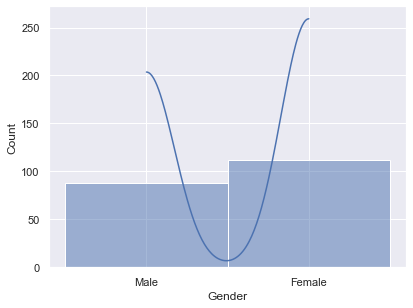

In [44]:
sns.histplot(data.Gender,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

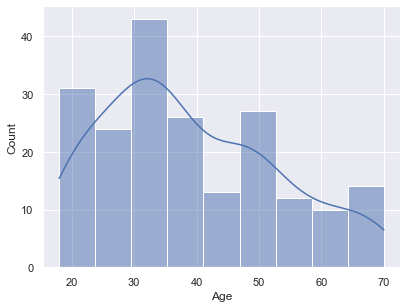

In [45]:
sns.histplot(data.Age,kde=True)

#### Bivariate analysis

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

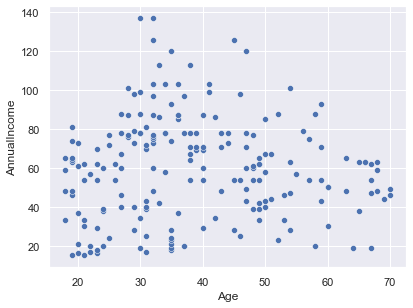

In [46]:
sns.scatterplot(data.Age,data.AnnualIncome)

### MULTIVARIATE ANALYSIS

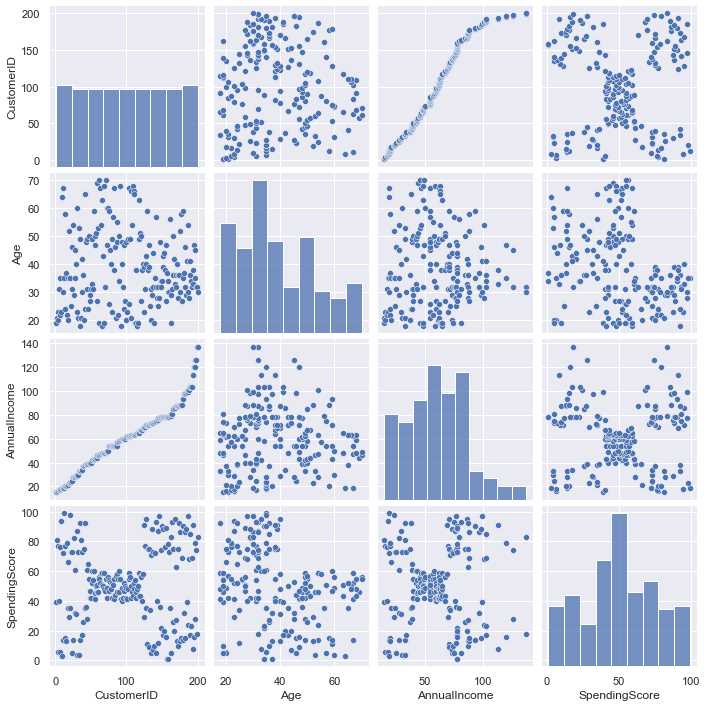

In [47]:
sns.pairplot(data)

#### 4. Perform descriptive statistics on the dataset

In [48]:
data.describe(include='all')

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


#### 5. Check for Missing values and deal with them

In [49]:
sns.set(color_codes=True)
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 6. Find the outliers and replace the outliers

In [50]:
matplotlib.rcParams['figure.figsize']=(6.4,4.8)
data.sample(10)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
179,180,Male,35,93,90
175,176,Female,30,88,86
84,85,Female,21,54,57
111,112,Female,19,63,54
150,151,Male,43,78,17
82,83,Male,67,54,41
2,3,Female,20,16,6
132,133,Female,25,72,34
101,102,Female,49,62,48
73,74,Female,60,50,56


### 7. Check for Categorical columns and perform encoding.

In [53]:
data.columns
headers=['CustomerID','Gender','Age','AnnualIncome','SpendingScore']
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 8. Scaling the data


In [60]:
data.drop("CustomerID", axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   AnnualIncome   200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [62]:
data.isnull().sum()

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [68]:
x = data.iloc[:,[2,3]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## 9. Perform any of the clustering algorithms

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


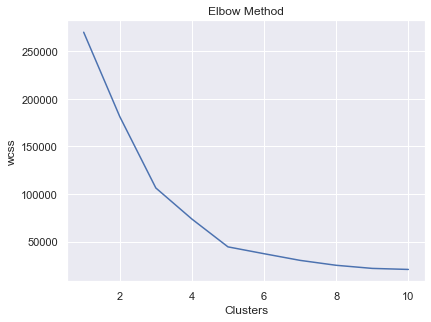

In [84]:
from sklearn.cluster import KMeans

w = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  w.append(km.inertia_)
  
plt.plot(range(1, 11), w)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show()

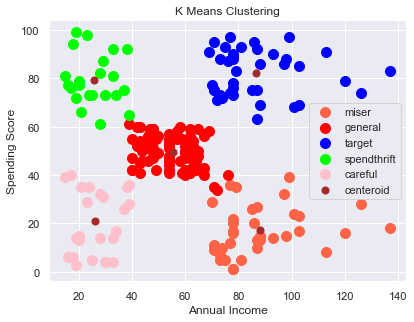

In [89]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'tomato', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'red', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'blue', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'lime', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'pink', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'brown' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()